In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
def plot_percentages(df):
    plt.scatter(df['time'], df['blocked_percentage'], c='green', s=0.1, label='blocked percentage')
    plt.scatter(df['time'], df['dropped_percentage'], c='red', s=0.1, label='dropped percentage')
    plt.legend(markerscale=10)
    plt.show()

In [3]:
def read_and_plot(file_name):
    with open("./output_data/" + file_name, "rb") as fin:
        data = pickle.load(fin)
    df = pd.DataFrame(data, columns=['id', 'time', 'blocked_percentage', 'dropped_percentage'])
    plot_percentages(df)


In [4]:
with open("./output_data/qos_0_1.pkl", "rb") as fin:
    test1 = pickle.load(fin)
test1_df = pd.DataFrame(test1, columns=['id', 'time1', 'blocked_percentage1', 'dropped_percentage1'])
test1_df_b = test1_df[['id', 'time1', 'blocked_percentage1']]
test1_df_b 

,id,time1,blocked_percentage1
0,0,0.261903,0.000000
1,1,2.256268,0.000000
2,2,3.376606,0.000000
3,3,4.819395,0.000000
4,4,5.784807,0.000000
...,...,...,...
359995,359995,137125.445615,0.003487
359996,359996,137125.464432,0.003487
359997,359997,137125.881931,0.003487
359998,359998,137125.908545,0.003487


In [5]:
with open("./output_data/qos_0_2.pkl", "rb") as fin:
    test2 = pickle.load(fin)
test2_df = pd.DataFrame(test2, columns=['id', 'time2', 'blocked_percentage2', 'dropped_percentage2'])
test2_df_b = test2_df[['id', 'time2', 'blocked_percentage2']]
test2_df_b

,id,time2,blocked_percentage2
0,0,1.437074,0.000000
1,1,1.561130,0.000000
2,2,2.570914,0.000000
3,3,4.054667,0.000000
4,4,5.086167,0.000000
...,...,...,...
359995,359995,135869.729680,0.003764
359996,359996,135869.797275,0.003764
359997,359997,135870.176295,0.003764
359998,359998,135870.649712,0.003764


In [6]:
replication = 10

In [7]:
def average_over_replication(fca):
    df_list = []
    for i in range(replication):
        with open("./output_data/qos_" + str(fca) + "_" + str(i) + ".pkl", "rb") as fin:
            data = pickle.load(fin)
        if i == 0:
            inner_df = pd.DataFrame(data, columns=['id', 'time0', 'blocked_percentage0', 'dropped_percentage0'])
        else:
            inner_df = pd.DataFrame(data, columns=['id', 'time' + str(i),\
                                                   'blocked_percentage' + str(i), 'dropped_percentage' + str(i)])
        df_list.append(inner_df)
    totaldf = pd.concat(df_list, axis=1, join="inner")
    return totaldf

In [8]:
def calculate_avgs(df):
    df = df.assign(blocked_avg = df.loc[:, ["blocked_percentage"+str(i) for i in range(replication)]].mean(axis=1))
    df = df.assign(dropped_avg = df.loc[:, ["dropped_percentage"+str(i) for i in range(replication)]].mean(axis=1))
    return df[['time0', 'blocked_avg', 'dropped_avg']]

In [9]:
def plot(df):
    plt.scatter(df['time0'], df['blocked_avg'], c='green', s=0.1, label='blocked percentage')
    plt.scatter(df['time0'], df['dropped_avg'], c='red', s=0.1, label='dropped percentage')
    plt.legend(markerscale=10)
    plt.show()

In [10]:
df = average_over_replication(3)
new_df = calculate_avgs(df)
new_df

,time0,blocked_avg,dropped_avg
0,0.170798,0.00000,0.000000
1,1.128299,0.00000,0.000000
2,3.467354,0.00000,0.000000
3,3.705716,0.00000,0.000000
4,3.783578,0.00000,0.000000
...,...,...,...
353651,139974.383830,0.05622,0.000753
353652,139974.453473,0.05622,0.000753
353653,139974.499575,0.05622,0.000753
353654,139975.053306,0.05622,0.000753


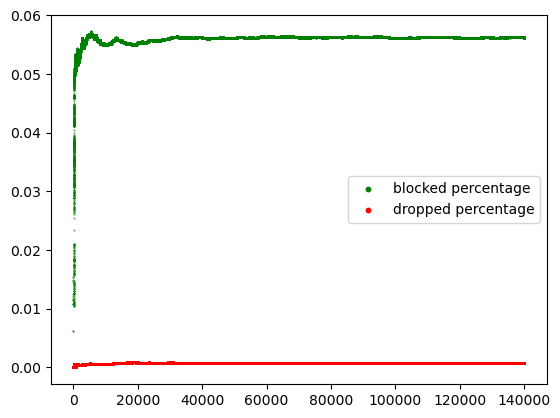

In [11]:
plot(new_df)

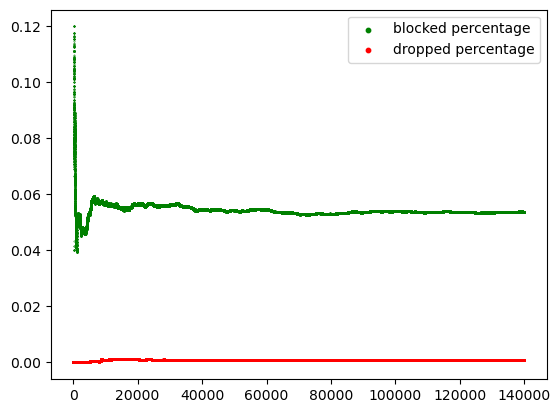

In [13]:
read_and_plot("qos_3_" + str(1) + ".pkl")

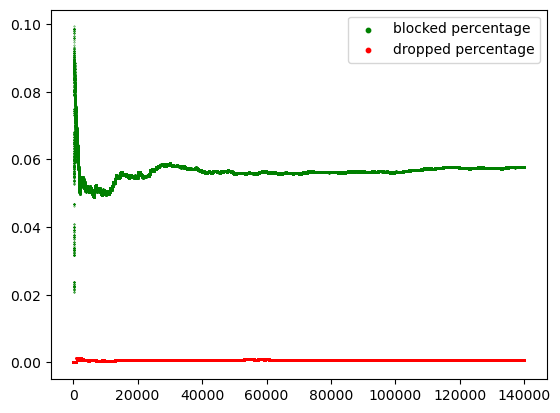

In [14]:
read_and_plot("qos_3_" + str(3) + ".pkl")

In [16]:
with open("./output_data/qos_0_percentages.pkl", "rb") as fin:
    percentages0 = pickle.load(fin)
fca_0_df = pd.DataFrame(percentages0, columns=['replication', 'block_percentage', 'drop_percentage'])
fca_0_df

,replication,block_percentage,drop_percentage
0,0,0.003791,0.006578
1,1,0.004036,0.006697
2,2,0.003747,0.005817
3,3,0.003441,0.005627
4,4,0.003210,0.006027
5,5,0.003323,0.005424
6,6,0.004094,0.005927
7,7,0.003941,0.006642
8,8,0.003374,0.005824
9,9,0.003734,0.006246


In [17]:
fca_0_df.loc[:, 'block_percentage'].mean()

0.0035654230581665413

In [18]:
fca_0_df.loc[:, 'drop_percentage'].mean()

0.0059177815982838075